In [167]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


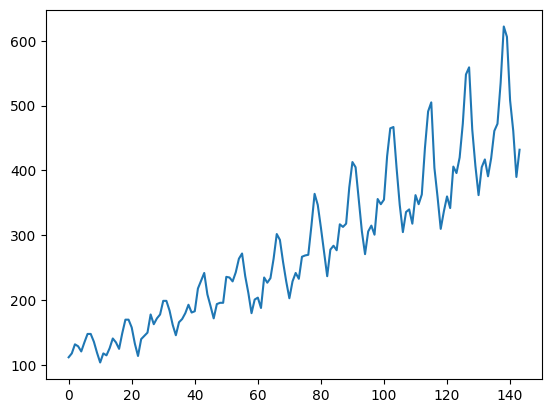

In [168]:
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/airline-passengers.csv', usecols=[1], engine='python')
plt.plot(dataset)
plt.show()

In [169]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [170]:
dataset = dataset.values
dataset = dataset.astype('float32')

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [171]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [172]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [173]:
trainX.shape

(94, 1, 1)

In [174]:
model = Sequential()
model.add(LSTM(3, unroll=True, input_shape=(1, look_back),go_backwards= True))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
94/94 - 1s - loss: 0.0329 - 673ms/epoch - 7ms/step
Epoch 2/20
94/94 - 0s - loss: 0.0156 - 124ms/epoch - 1ms/step
Epoch 3/20
94/94 - 0s - loss: 0.0119 - 129ms/epoch - 1ms/step
Epoch 4/20
94/94 - 0s - loss: 0.0109 - 128ms/epoch - 1ms/step
Epoch 5/20
94/94 - 0s - loss: 0.0101 - 126ms/epoch - 1ms/step
Epoch 6/20
94/94 - 0s - loss: 0.0093 - 132ms/epoch - 1ms/step
Epoch 7/20
94/94 - 0s - loss: 0.0085 - 127ms/epoch - 1ms/step
Epoch 8/20
94/94 - 0s - loss: 0.0077 - 125ms/epoch - 1ms/step
Epoch 9/20
94/94 - 0s - loss: 0.0068 - 130ms/epoch - 1ms/step
Epoch 10/20
94/94 - 0s - loss: 0.0061 - 123ms/epoch - 1ms/step
Epoch 11/20
94/94 - 0s - loss: 0.0052 - 116ms/epoch - 1ms/step
Epoch 12/20
94/94 - 0s - loss: 0.0045 - 125ms/epoch - 1ms/step
Epoch 13/20
94/94 - 0s - loss: 0.0040 - 115ms/epoch - 1ms/step
Epoch 14/20
94/94 - 0s - loss: 0.0035 - 122ms/epoch - 1ms/step
Epoch 15/20
94/94 - 0s - loss: 0.0031 - 150ms/epoch - 2ms/step
Epoch 16/20
94/94 - 0s - loss: 0.0027 - 136ms/epoch - 1ms/step
E

In [175]:

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

2/2 [==============================] - 0s 3ms/step
Train Score: 23.32 RMSE
Test Score: 54.35 RMSE


In [176]:
testY

array([[301.00001152, 355.999993  , 348.00001085, 355.00000681,
        421.9999924 , 465.0000161 , 466.99998848, 403.99999397,
        346.99999379, 304.99998716, 335.99999132, 339.99999783,
        317.99999288, 362.00000277, 348.00001085, 362.99998896,
        434.99999813, 491.00002756, 505.00001948, 403.99999397,
        359.00001333, 310.00001073, 337.00000838, 359.99999952,
        342.00000109, 406.0000281 , 395.99998094, 420.00002002,
        471.99998119, 548.00004318, 559.00001477, 462.99998197,
        407.00001429, 362.00000277, 404.99998016, 416.9999997 ,
        390.99998824, 418.99997208, 461.00000959, 471.99998119,
        535.00003745, 622.00000929, 606.00004499, 507.99997805,
        461.00000959, 390.00000205]])

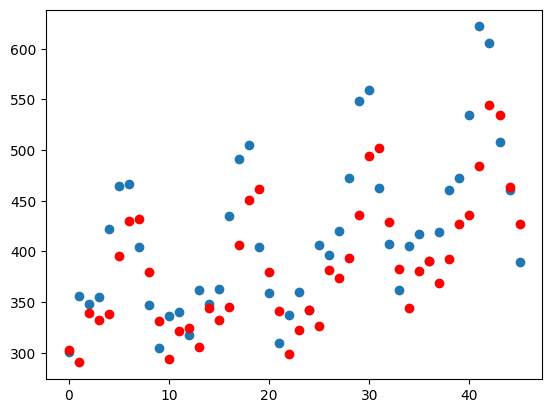

In [177]:
X = list(range(testY.size))
plt.scatter(X,testY)
plt.scatter(X,testPredict,color='red')
plt.show()